In [204]:
import datasets as ds
import utils as ut
import models as md

# sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fairlearn
from fairlearn.postprocessing import ThresholdOptimizer
from xgboost import XGBClassifier

# libs 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
dataset = ds.Dataset('biasbios', target_occ='professor', rep='BOW')
dataset.split_train_test()

generating Bag of Words


In [193]:
clf = LogisticRegression()
clf.fit(dataset.x_train, dataset.y_train)

p = clf.predict_proba(dataset.x_test)[:, 1]
p_acc = accuracy_score(dataset.y_test, p > 0.5)
print("clf_acc", p_acc)

clf_acc 0.8437144482366326


/Users/jhs/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [374]:
plot_df = [] 
pg_clf_dict = {} 
for i in range(len(dataset.class_map)): 
    p = clf.predict_proba(dataset.x_test)[:, 1]
    pg_clf = LogisticRegression()
    mask = dataset.y_all_train == i 
    pg_clf.fit(dataset.x_train[mask], dataset.g_train[mask])
    pg = pg_clf.predict_proba(dataset.x_test)[:, 1]
    mask = dataset.y_all_test == i 
    clf_acc = accuracy_score(dataset.g_test[mask], pg_clf.predict(dataset.x_test[mask]))
    print(f"acc: {clf_acc} cov(p, pg) {ut.emp_cov(p, pg)}")
    if clf_acc > 0.6: 
        plot_df.append({'cov(y, pg)': ut.emp_cov(dataset.y_test, pg), 
                        'cov(g, pg)': ut.emp_cov(dataset.g_test, pg),
                        'corr(y, pg)': stats.pearsonr(dataset.y_test, pg)[0], 
                        'corr(g, pg)': stats.pearsonr(dataset.g_test, pg)[0],
                        'corr(p, pg)': stats.pearsonr(p, pg)[0],
                        'cov(p, pg)': ut.emp_cov(p, pg), 
                        'pg': dataset.reverse_class_map[i]})
        pg_clf_dict[dataset.reverse_class_map[i]] = pg_clf
    
pg_all_clf = LogisticRegression()
pg_all_clf.fit(dataset.x_train, dataset.g_train)
pg_all_clf.predict_proba(dataset.x_test)[:, 1]
plot_df.append({'cov(y, pg)': ut.emp_cov(dataset.y_test, pg), 
                'cov(g, pg)': ut.emp_cov(dataset.g_test, pg),
                'corr(y, pg)': stats.pearsonr(dataset.y_test, pg)[0], 
                'corr(g, pg)': stats.pearsonr(dataset.g_test, pg)[0],
                'corr(p, pg)': stats.pearsonr(p, pg)[0],
                'cov(p, pg)': ut.emp_cov(p, pg),
                'pg': "all"})
pg_clf_dict['all'] = pg_all_clf
print(f"pg all {accuracy_score(dataset.g_test, pg_all_clf.predict(dataset.x_test))}")
plot_df = pd.DataFrame(plot_df)

acc: 0.8611111111111112 cov(p, pg) 0.0008009932706815287
acc: 0.8 cov(p, pg) 0.005520166904314881
acc: 0.9126984126984127 cov(p, pg) -0.0022459270547931106
acc: 0.5827338129496403 cov(p, pg) -0.0020597151030327943
acc: 0.5763888888888888 cov(p, pg) 0.006593440050694594
acc: 0.4779874213836478 cov(p, pg) 0.0008282848706321825
acc: 0.9615384615384616 cov(p, pg) 0.00376747583174959
acc: 0.6086956521739131 cov(p, pg) 0.008082912428867077
acc: 0.6166666666666667 cov(p, pg) 0.0004027359335583044


/Users/jhs/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jhs/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

acc: 0.6078020134228188 cov(p, pg) -0.004206159550848106
acc: 0.5836177474402731 cov(p, pg) -0.009216123998453918
acc: 0.9012345679012346 cov(p, pg) -0.0008780273073165373
acc: 0.8560606060606061 cov(p, pg) -0.002130205753609064
acc: 0.8785714285714286 cov(p, pg) -0.017029092082091947
acc: 0.8571428571428571 cov(p, pg) 0.007233056678884219
acc: 0.5915032679738562 cov(p, pg) -0.011320260973988616
acc: 0.6516007532956686 cov(p, pg) 0.008150412073227047
acc: 0.6973684210526315 cov(p, pg) -0.0002451888539406867
acc: 0.6216216216216216 cov(p, pg) -0.003948444629187534
acc: 0.6521739130434783 cov(p, pg) 0.02475774889762102
acc: 0.9382716049382716 cov(p, pg) -0.005062327821004235
acc: 0.7619047619047619 cov(p, pg) 0.013036543445574547
acc: 0.9615384615384616 cov(p, pg) -0.001324074078429976
acc: 0.9375 cov(p, pg) -0.0027688353712983123
acc: 0.55 cov(p, pg) 0.008287662694276136
acc: 0.8 cov(p, pg) 0.0012934965475926712
acc: 0.6822995461422088 cov(p, pg) 0.014610993720287227
acc: 0.816216216216

/Users/jhs/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [379]:
plot_list = ['comedian', 'dj', 'personal_trainer', 'physician',
 'professor', 'nurse', 'software_engineer', 'model', 'surgeon', 'photographer',
 'accountant', 'chiropractor', 'filmmaker', 'dietitian', 'pastor', 'attorney', 'all']

In [435]:
def scatter_w_labels(plot_df, x_feat, y_feat): 
    sns.scatterplot(data=plot_df, x=x_feat, y=y_feat)
    for row in plot_df.iterrows():
        x = row[1][x_feat]
        y = row[1][y_feat]

        label = row[1]['pg']
        plt.text(x, y +0.0005, label, fontsize=12, ha='center', va='bottom')

In [436]:
plot_df[plot_df['pg'].isin(plot_list)]

,"cov(y, pg)","cov(g, pg)","corr(y, pg)","corr(g, pg)","corr(p, pg)","cov(p, pg)",pg
1,0.006060,0.007428,0.095755,0.112178,0.112195,0.005520,comedian
3,0.003442,0.001292,0.174623,0.062657,0.245802,0.003767,dj
4,0.008938,0.005422,0.126506,0.073351,0.147151,0.008083,personal_trainer
6,-0.005094,0.027846,-0.037290,0.194804,-0.039601,-0.004206,professor
7,-0.000690,-0.000009,-0.016964,-0.000207,-0.027771,-0.000878,nurse
8,-0.002209,0.005714,-0.039551,0.097761,-0.049051,-0.002130,software_engineer
9,-0.016344,0.003675,-0.182542,0.039228,-0.244631,-0.017029,model
11,0.006318,0.015821,0.047712,0.114189,0.079166,0.008150,photographer
12,0.000495,0.006126,0.005621,0.066500,-0.003582,-0.000245,accountant
13,-0.003620,0.002492,-0.070072,0.046104,-0.098292,-0.003948,chiropractor


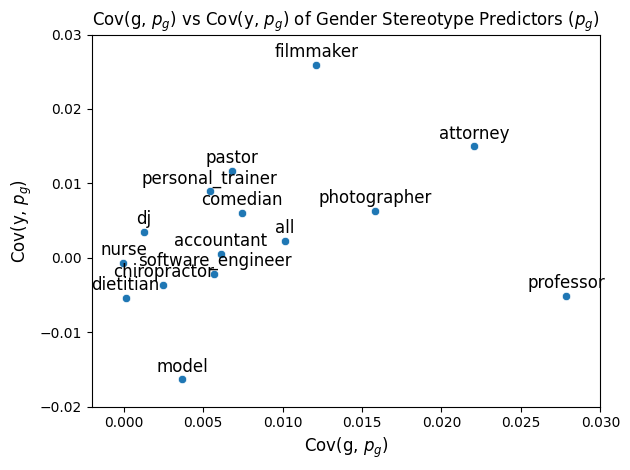

In [440]:

scatter_w_labels(plot_df[plot_df['pg'].isin(plot_list)], 
                 x_feat='cov(g, pg)',y_feat='cov(y, pg)')
plt.title(r"Cov(g, $p_g$) vs Cov(y, $p_g$) of Gender Stereotype Predictors ($p_g$)")
plt.ylabel(r"Cov(y, $p_g$)", fontsize=12)
plt.xlabel(r"Cov(g, $p_g$)", fontsize=12)
plt.xlim(-0.002, 0.03)
plt.ylim(-0.02, 0.03)
plt.tight_layout()
plt.savefig("bio-pgs.pdf")

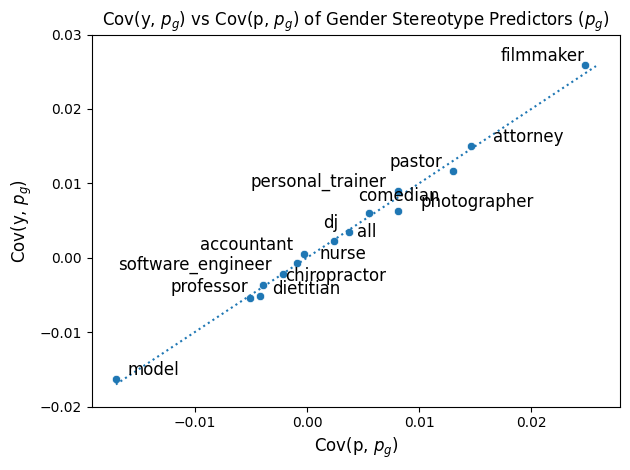

In [443]:
plot_list = ['comedian', 'dj', 'personal_trainer', 
 'professor', 'nurse', 'software_engineer', 'model', 'photographer',
 'accountant', 'chiropractor', 'filmmaker', 'dietitian', 'pastor', 'attorney', 'all']

df = plot_df[plot_df['pg'].isin(plot_list)]
df = df.sort_values(by='cov(p, pg)')
x_feat='cov(p, pg)'
y_feat='cov(y, pg)'

sns.scatterplot(data=df, x=x_feat, y=y_feat)
for i, row in enumerate(df.iterrows()):
    x = row[1][x_feat]
    y = row[1][y_feat]

    label = row[1]['pg']
    if label == "model": 
        plt.text(x+0.001, y, label, fontsize=12, ha='left', va='bottom')
    elif label == "filmmaker": 
        plt.text(x, y, label, fontsize=12, ha='right', va='bottom')
    elif label == "comedian": 
        plt.text(x-0.001, y+0.001, label, fontsize=12, ha='left', va='bottom')
    elif i % 2 == 0: 
        plt.text(x-0.001, y, label, fontsize=12, ha='right', va='bottom')
    else: 
        plt.text(x+0.002, y, label, fontsize=12, ha='left', va='bottom')
        
        
# scatter_w_labels(plot_df[plot_df['pg'].isin(plot_list)], x_feat='cov(p, pg)',y_feat='cov(y, pg)')


x = np.linspace(np.min(plot_df['cov(p, pg)']), np.max(plot_df['cov(p, pg)'])+0.001, 10)
y = x
plt.plot(x, y, linestyle=":")
plt.title(r"Cov(y, $p_g$) vs Cov(p, $p_g$) of Gender Stereotype Predictors ($p_g$)")
plt.ylabel(r"Cov(y, $p_g$)", fontsize=12)
plt.xlabel(r"Cov(p, $p_g$)", fontsize=12)
plt.ylim(-0.02, 0.03)

plt.tight_layout()
plt.savefig("bio-amplification.pdf")

In [447]:
# demographic parity
# base classifier
results = ut.results_summary(clf=clf, 
                            pg1=pg_clf_dict['filmmaker'], 
                            pg2=pg_clf_dict['attorney'], 
                            x=dataset.x_test, 
                            y=dataset.y_test, 
                            g=dataset.g_test)
results

{'accuracy': 0.8437144482366326,
 'cov(p, pg1)': 0.02475774889762102,
 'cov(p, pg2)': 0.014610993720287227,
 'DP': 0.009696455348629285,
 'cov(p, pg1 |y=1)': 0.02227618209899451,
 'cov(p, pg2 |y=1)': 0.011172884841591627,
 'EO': 0.020087559133240562}

In [200]:
postprocess_est = ThresholdOptimizer(
    estimator=clf, 
    constraints="demographic_parity", 
    objective='accuracy_score', 
    predict_method="predict", 
    flip =True
)

postprocess_est.fit(X=dataset.x_train.toarray(), 
                    y=dataset.y_train, 
                    sensitive_features=dataset.g_train)

p_train = postprocess_est.predict(dataset.x_train.toarray(), sensitive_features=dataset.g_train)

p_clf = LogisticRegression()
p_clf.fit(dataset.x_train, p_train)
print(f"acc: {accuracy_score(p_train, p_clf.predict(dataset.x_train))}")

results = ut.results_summary(clf=p_clf, 
                            pg1=pg_clf_dict['filmmaker'], 
                            pg2=pg_clf_dict['attorney'], 
                            x=dataset.x_test, 
                            y=dataset.y_test, 
                            g=dataset.g_test)
results

/Users/jhs/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc: 0.9744621198269031


/Users/jhs/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy': 0.8449943117178612,
 'cov(p, pg1)': 0.027936585203455558,
 'cov(p, pg2)': 0.015896658820360524,
 'DP': 0.002271045749306644}

In [202]:
for name in ['filmmaker', 'attorney']: 
    c_post_processed = md.MACov(base_clf=clf, pg_clf=pg_clf_dict[name])
    md.fit_pg_cont(p_x=dataset.x_train, 
                   base_clf=c_post_processed, 
                   pg_clf=pg_clf_dict[name], 
                   alpha=1e-4)
    p_train = c_post_processed.predict_proba_1d(dataset.x_train)

    p_clf = LogisticRegression()
    p_clf.fit(dataset.x_train, p_train>0.5)
    print(f"acc: {accuracy_score(p_train>0.5, p_clf.predict(dataset.x_train))}")
    
    results = ut.results_summary(clf=c_post_processed, 
                            pg1=pg_clf_dict['filmmaker'], 
                            pg2=pg_clf_dict['attorney'], 
                                x=dataset.x_test, 
                                y=dataset.y_test, 
                                g=dataset.g_test)
    print(name, results)

0 0.024813981862111815 0.0001
1 0.023782657032903217 0.0001
2 0.022860703700949964 0.0001
3 0.0220084299432784 0.0001
4 0.021209522550781516 0.0001
5 0.02045532745624192 0.0001
6 0.019738328015746088 0.0001
7 0.019054868113290987 0.0001
8 0.018405363466585518 0.0001
9 0.017787167583643845 0.0001
10 0.017195210610156553 0.0001
11 0.016628179433933292 0.0001
12 0.016083874763414153 0.0001
13 0.015561523727468033 0.0001
14 0.01505897104211896 0.0001
15 0.014575316633221723 0.0001
16 0.014109966743817162 0.0001
17 0.013661688693021557 0.0001
18 0.013229159261780133 0.0001
19 0.012811652254488031 0.0001
20 0.012408633451749192 0.0001
21 0.012019831917765213 0.0001
22 0.011644550856716191 0.0001
23 0.01128204663761914 0.0001
24 0.010932162724651744 0.0001
25 0.010594032161807638 0.0001
26 0.010267277675388025 0.0001
27 0.009951501935235366 0.0001
28 0.009646772525118655 0.0001
29 0.009351796933303189 0.0001
30 0.009066241154187155 0.0001
31 0.00879016825521324 0.0001
32 0.008523346027188622 

/Users/jhs/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc: 0.9650454074480405
filmmaker {'accuracy': 0.8084470989761092, 'cov(p, pg1)': 0.005227389938556817, 'cov(p, pg2)': 0.0059263108688356455, 'DP': 0.016836005966440748}
0 0.014286406780881594 0.0001
1 0.013406035365896664 0.0001
2 0.012652575650816716 0.0001
3 0.011976440244443292 0.0001
4 0.011359522705579099 0.0001
5 0.010791766525755012 0.0001
6 0.010265324150126503 0.0001
7 0.009773419513493857 0.0001
8 0.009313087030272733 0.0001
9 0.008881797399396322 0.0001
10 0.008475621196597075 0.0001
11 0.008093310602078395 0.0001
12 0.007731372169562814 0.0001
13 0.00738887266148343 0.0001
14 0.007064132418251602 0.0001
15 0.00675645919059531 0.0001
16 0.006465158861274178 0.0001
17 0.0061884587317376 0.0001
18 0.005925138746338378 0.0001
19 0.0056752338511385295 0.0001
20 0.005437612907968421 0.0001
21 0.005211415870038197 0.0001
22 0.004995843632462548 0.0001
23 0.004790419260749449 0.0001
24 0.004594455452410749 0.0001
25 0.004407215208854253 0.0001
26 0.004228201555570832 0.0001
27 0.0

/Users/jhs/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [301]:
clf_list = [pg_clf_dict["attorney"], pg_clf_dict["filmmaker"]]
c_post_processed = md.DPMulti(base_clf=clf, pg_clf_list=clf_list)
md.fit_dp_pg_multi(x=dataset.x_train, 
               multi_clf=c_post_processed, 
               alpha=1e-4)
p_train = c_post_processed.predict_proba_1d(dataset.x_train)

print(f"acc: {accuracy_score(p_train>0.5, p_clf.predict(dataset.x_train))}")

results = ut.results_summary(clf=c_post_processed, 
                        pg1=pg_clf_dict['filmmaker'], 
                        pg2=pg_clf_dict['attorney'], 
                            x=dataset.x_test, 
                            y=dataset.y_test, 
                            g=dataset.g_test)
print(name, results)

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  2.02it/s]


acc: 0.9243920277930152
attorney {'accuracy': 0.7967861205915814, 'cov(p, pg1)': 0.0053000227268898545, 'cov(p, pg2)': -0.001201037073445537, 'DP': 0.030939041808607015}


In [448]:
# Equal Opportunity wrt Groups

postprocess_est = ThresholdOptimizer(
    estimator=clf, 
    constraints="true_positive_rate_parity", 
    objective='accuracy_score', 
    predict_method="predict", 
    flip =True
)

postprocess_est.fit(X=dataset.x_train.toarray(), 
                    y=dataset.y_train, 
                    sensitive_features=dataset.g_train)

p_train = postprocess_est.predict(dataset.x_train.toarray(), sensitive_features=dataset.g_train)

p_clf = LogisticRegression()
p_clf.fit(dataset.x_train, p_train)
print(f"acc: {accuracy_score(p_train, p_clf.predict(dataset.x_train))}")

results = ut.results_summary(clf=p_clf, 
                            pg1=pg_clf_dict['filmmaker'], 
                            pg2=pg_clf_dict['attorney'], 
                            x=dataset.x_test, 
                            y=dataset.y_test, 
                            g=dataset.g_test)
results


/Users/jhs/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc: 0.9813189492289877


/Users/jhs/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy': 0.8479806598407281,
 'cov(p, pg1)': 0.028198775661911764,
 'cov(p, pg2)': 0.01628002309224758,
 'DP': 0.0035776883602970377,
 'cov(p, pg1 |y=1)': 0.026691578640138505,
 'cov(p, pg2 |y=1)': 0.014014162292839192,
 'EO': 0.006048992682855192}

In [450]:
# Equal Opportunity: 

eo_clf = md.EOClf(base_clf=clf, pg_clf=pg_clf_dict["filmmaker"])
eo_clf.fit_exact(x=dataset.x_train, y=dataset.y_train)



p = clf.predict_proba(dataset.x_train)[:, 1]
pg = pg_clf_dict["attorney"].predict_proba(dataset.x_train)[:, 1]

eo_clf.check_bins(y=dataset.y_train, p=p, pg=pg, a=0.5, b=1.0)


print(f"prev cov {ut.eo_metric(y_pred=p, y_true=dataset.y_train, pg=pg):.2f}")

p = eo_clf.predict_proba_1d(dataset.x_train)
print(f"new cov {ut.eo_metric(y_pred=p, y_true=dataset.y_train, pg=pg):.2f}")

results = ut.results_summary(clf=eo_clf, 
                        pg1=pg_clf_dict['filmmaker'], 
                        pg2=pg_clf_dict['attorney'], 
                            x=dataset.x_test, 
                            y=dataset.y_test, 
                            g=dataset.g_test)
results


0.7220273164929993
prev cov 0.01
new cov 0.00


{'accuracy': 0.842292377701934,
 'cov(p, pg1)': 0.013801228408200203,
 'cov(p, pg2)': 0.009578863684665664,
 'DP': 0.0009564900869248327,
 'cov(p, pg1 |y=1)': 0.0033421856396477784,
 'cov(p, pg2 |y=1)': 0.00313947161921859,
 'EO': 0.008036170653567876}

In [292]:
c_post_processed = md.DPMulti(base_clf=clf, pg_clf_list=list(pg_clf_dict.values()))
md.fit_ma_pg_multi(p_x=dataset.x_train, 
                   y=dataset.y_train, 
                   multi_clf=c_post_processed, 
                   alpha=1e-4, 
                  max_iter=20)

100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [01:51<00:00,  9.57s/it]


In [293]:
new_plot_df = [] 
for key, pg_clf in pg_clf_dict.items(): 
    pg = pg_clf.predict_proba(dataset.x_test)[:, 1]
    p = c_post_processed.predict_proba_1d(dataset.x_test)
    new_plot_df.append({'cov(y, pg)': ut.emp_cov(dataset.y_test, pg), 
                'cov(g, pg)': ut.emp_cov(dataset.g_test, pg),
                'corr(y, pg)': stats.pearsonr(dataset.y_test, pg)[0], 
                'corr(g, pg)': stats.pearsonr(dataset.g_test, pg)[0],
                'corr(p, pg)': stats.pearsonr(p, pg)[0],
                'cov(p, pg)': ut.emp_cov(p, pg), 
                'pg': key})
new_plot_df = pd.DataFrame(new_plot_df)


In [296]:
print(accuracy_score(c_post_processed.predict(dataset.x_test), dataset.y_test))
print(accuracy_score(clf.predict(dataset.x_test), dataset.y_test))

0.8434300341296929
0.8437144482366326


Text(0.5, 1.0, 'Multi-Accuracy')

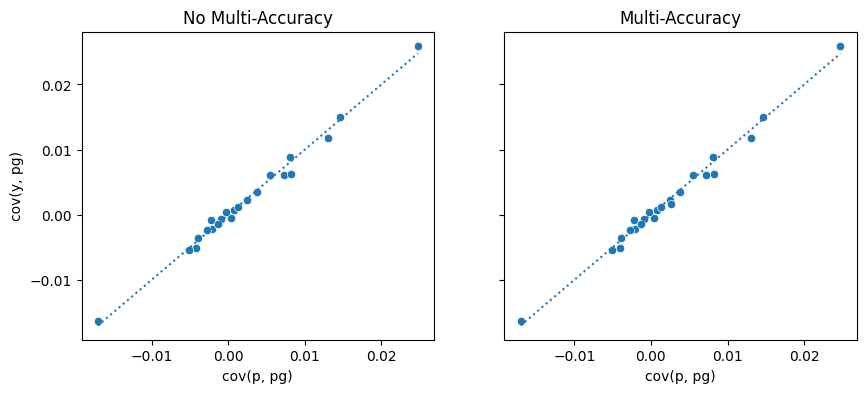

In [294]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
sns.scatterplot(plot_df, x='cov(p, pg)', y='cov(y, pg)', ax=axes[0])
x = np.linspace(np.min(plot_df['cov(p, pg)']), np.max(plot_df['cov(p, pg)']), 10)
y = x
axes[0].plot(x, y, linestyle=":")
axes[0].set_title("No Multi-Accuracy")

sns.scatterplot(new_plot_df, x='cov(p, pg)', y='cov(y, pg)', ax=axes[1])
x = np.linspace(np.min(new_plot_df['cov(p, pg)']), np.max(new_plot_df['cov(p, pg)']), 10)
y = x
axes[1].plot(x, y, linestyle=":")
axes[1].set_title("Multi-Accuracy")